# Ejercicio de Imputación de datos
Seleccione un dataset de Kaggle llamado Airbnb_Open_data.csv

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


from matplotlib import pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("new_airbnb_data.csv")
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,27623301,NYC oasis in Gramercy,31250838867,unconfirmed,Michal,Manhattan,Stuyvesant Town,40.73549,-73.97707,United States,...,$190,20.0,0.0,NaN,NaN,4.0,1.0,30.0,NaN,NaN
1,53024130,Gorgeous Times Square Flat!,46261863080,verified,Jowelle,Manhattan,Hell's Kitchen,40.76008,-73.98846,United States,...,$109,2.0,41.0,5/29/2019,2.79,5.0,5.0,169.0,NaN,NaN
2,50922076,"Great Room &Host, steps from #1 train",17623893479,unconfirmed,Dee,Manhattan,Harlem,40.82378,-73.95354,United States,...,$162,60.0,13.0,8/15/2018,0.67,3.0,4.0,0.0,No smoking or parties please. Kaya (the fluffi...,NaN
3,50265391,Spacious Private Bedroom in the North Bronx,48334233422,verified,Liliana,Bronx,Kingsbridge,40.88283,-73.89326,United States,...,$66,3.0,2.0,5/25/2017,0.07,5.0,1.0,363.0,No smoking! If I smell smoke or if there is ot...,NaN
4,5566648,Colorful & Spacious near A Express,45624334759,verified,Andrew,Manhattan,Washington Heights,40.85111,-73.93325,United States,...,$26,2.0,48.0,6/30/2019,0.97,4.0,1.0,223.0,House Rules 1. Check-in is 4 pm local time. If...,NaN


In [3]:
# Lista de columnas a eliminar
columnas_eliminar = ["host id", "host name", "neighbourhood group", "lat", "long", 
                     "country code", "instant_bookable", "Construction year",
                     "house_rules", "license"]

# Eliminar las columnas
df = df.drop(columns=columnas_eliminar)

# Guardar el DataFrame modificado en un nuevo archivo CSV
df.to_csv("airbnbnew.csv", index=False)

In [4]:
# Eliminar los símbolos de dólar ($) de la columna 'price' y convertir a flotante
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Guardar el DataFrame modificado en un nuevo archivo CSV
df.to_csv("airbnbnew.csv", index=False)

In [5]:
df

,id,NAME,host_identity_verified,neighbourhood,country,cancellation_policy,room type,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,27623301,NYC oasis in Gramercy,unconfirmed,Stuyvesant Town,United States,flexible,Entire home/apt,951.0,$190,20.0,0.0,NaN,NaN,4.0,1.0,30.0
1,53024130,Gorgeous Times Square Flat!,verified,Hell's Kitchen,United States,strict,Entire home/apt,543.0,$109,2.0,41.0,5/29/2019,2.79,5.0,5.0,169.0
2,50922076,"Great Room &Host, steps from #1 train",unconfirmed,Harlem,United States,strict,Private room,812.0,$162,60.0,13.0,8/15/2018,0.67,3.0,4.0,0.0
3,50265391,Spacious Private Bedroom in the North Bronx,verified,Kingsbridge,United States,moderate,Private room,328.0,$66,3.0,2.0,5/25/2017,0.07,5.0,1.0,363.0
4,5566648,Colorful & Spacious near A Express,verified,Washington Heights,United States,strict,Private room,132.0,$26,2.0,48.0,6/30/2019,0.97,4.0,1.0,223.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10255,33885278,Beautiful & Modern 2 bedroom apartment,unconfirmed,Hell's Kitchen,United States,moderate,Entire home/apt,837.0,$167,30.0,4.0,1/1/2022,0.50,3.0,37.0,251.0
10256,50566947,Nice one Bedroom in Williamsburg,verified,Williamsburg,United States,moderate,Entire home/apt,77.0,$15,4.0,2.0,1/4/2017,0.07,4.0,1.0,0.0
10257,12214131,ENTIRE UNIT: MID TOWN NYC - GRAND CENTRAL STATION,verified,Midtown,United States,flexible,Entire home/apt,603.0,$121,3.0,0.0,NaN,NaN,2.0,1.0,0.0
10258,44962207,Fully Fancy Furnish Apartment in Manhattan.,verified,Upper East Side,United States,flexible,Entire home/apt,898.0,$180,30.0,2.0,8/22/2018,0.08,2.0,1.0,120.0


In [6]:
# explorando los datos
df.describe([0.01, 0.05, 0.75, 0.90, 0.99]).T

,count,mean,std,min,1%,5%,50%,75%,90%,99%,max
id,10260.0,2.885006e+07,1.624911e+07,1014039.00,1510429.63,3843444.40,28572152.00,42771646.75,51639790.10,5.675966e+07,57363551.00
price,10234.0,6.159875e+02,3.312352e+02,50.00,60.00,106.65,613.00,903.00,1078.00,1.188000e+03,1200.00
minimum nights,10221.0,7.909011e+00,1.905914e+01,-12.00,1.00,1.00,3.00,5.00,30.00,4.940000e+01,366.00
number of reviews,10242.0,2.727426e+01,4.894933e+01,0.00,0.00,0.00,7.00,30.00,81.00,2.210000e+02,966.00
reviews per month,8679.0,1.354481e+00,1.617065e+00,0.01,0.02,0.05,0.74,2.00,3.53,6.683200e+00,34.46
review rate number,10224.0,3.277289e+00,1.291394e+00,1.00,1.00,1.00,3.00,4.00,5.00,5.000000e+00,5.00
calculated host listings count,10217.0,8.150925e+00,3.355678e+01,1.00,1.00,1.00,1.00,2.00,7.00,2.080000e+02,332.00
availability 365,10225.0,1.385696e+02,1.352048e+02,-10.00,0.00,0.00,90.00,264.00,351.00,4.070000e+02,426.00


In [7]:
df.info()
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10260 entries, 0 to 10259
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10260 non-null  int64  
 1   NAME                            10232 non-null  object 
 2   host_identity_verified          10237 non-null  object 
 3   neighbourhood                   10259 non-null  object 
 4   country                         10208 non-null  object 
 5   cancellation_policy             10255 non-null  object 
 6   room type                       10260 non-null  object 
 7   price                           10234 non-null  float64
 8   service fee                     10226 non-null  object 
 9   minimum nights                  10221 non-null  float64
 10  number of reviews               10242 non-null  float64
 11  last review                     8678 non-null   object 
 12  reviews per month               

In [8]:
df.isnull().sum()

id                                   0
NAME                                28
host_identity_verified              23
neighbourhood                        1
country                             52
cancellation_policy                  5
room type                            0
price                               26
service fee                         34
minimum nights                      39
number of reviews                   18
last review                       1582
reviews per month                 1581
review rate number                  36
calculated host listings count      43
availability 365                    35
dtype: int64

In [9]:
# Cuenta los valores cero en cada columna
valores_cero_por_columna = (df == 0).sum()

# Imprime el resultado
print("Valores cero por columna:")
print(valores_cero_por_columna)

Valores cero por columna:
id                                   0
NAME                                 0
host_identity_verified               0
neighbourhood                        0
country                              0
cancellation_policy                  0
room type                            0
price                                0
service fee                          0
minimum nights                       0
number of reviews                 1567
last review                          0
reviews per month                    0
review rate number                   0
calculated host listings count       0
availability 365                  2390
dtype: int64


In [10]:
# Creando un gráfico de datos faltantes para conocer cuantos valores incompletos hay en el conjunto de datos
def missing_plot(dataset, key) :
    null_feat = pd.DataFrame(len(dataset[key]) - dataset.isnull().sum(), columns = ['Count'])
    percentage_null = pd.DataFrame((len(dataset[key]) - (len(dataset[key]) - dataset.isnull().sum()))/len(dataset[key])*100, columns = ['Count'])
    percentage_null = percentage_null.round(2)

    trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, text = percentage_null['Count'],  textposition = 'auto',marker=dict(color = '#7EC0EE',
            line=dict(color='#000000',width=1.5)))

    layout = dict(title =  "Missing Values (count & %)")

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [11]:
# Plotting
missing_plot(df, 'id')

En el gráfico se logra apreciar que hay dos columnas con el 50% de datos faltantes las cuales son "Instant Bookable" y "House rules"


In [12]:
# revisando los datos faltantes en forma de tabla (missing columns)
def missing_percent(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_table = pd.concat([mis_val, mis_percent], axis=1)

        # Rename the columns
        mis_columns = mis_table.rename(
        columns = {0 : 'Missing Values', 1 : 'Percent of Total Values'})

        # Sort the table by percentage of missing descending
        mis_columns = mis_columns[
            mis_columns.iloc[:,1] != 0].sort_values(
        'Percent of Total Values', ascending=False).round(2)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_columns

miss_cols_info = missing_percent(df)
miss_cols_info

Your selected dataframe has 16 columns.
There are 14 columns that have missing values.


,Missing Values,Percent of Total Values
last review,1582,15.42
reviews per month,1581,15.41
country,52,0.51
calculated host listings count,43,0.42
minimum nights,39,0.38
review rate number,36,0.35
availability 365,35,0.34
service fee,34,0.33
NAME,28,0.27
price,26,0.25


In [13]:
# Las columnas con valores faltantes de más del 70% son eliminadas, se considera que en este caso los valores tienen tantas columnas faltantes que no se puede hacer nada con ellos.
 # se apliucarán diferentes operaciones de acuerdo a las proporciones de faltantes en el conjunto de datos. Por ejemplo, se quieren eliminar las variables independientes que tengan más del 25% de los datos faltantes.

df_drop = df.copy()
df_drop.head()

,id,NAME,host_identity_verified,neighbourhood,country,cancellation_policy,room type,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,27623301,NYC oasis in Gramercy,unconfirmed,Stuyvesant Town,United States,flexible,Entire home/apt,951.0,$190,20.0,0.0,NaN,NaN,4.0,1.0,30.0
1,53024130,Gorgeous Times Square Flat!,verified,Hell's Kitchen,United States,strict,Entire home/apt,543.0,$109,2.0,41.0,5/29/2019,2.79,5.0,5.0,169.0
2,50922076,"Great Room &Host, steps from #1 train",unconfirmed,Harlem,United States,strict,Private room,812.0,$162,60.0,13.0,8/15/2018,0.67,3.0,4.0,0.0
3,50265391,Spacious Private Bedroom in the North Bronx,verified,Kingsbridge,United States,moderate,Private room,328.0,$66,3.0,2.0,5/25/2017,0.07,5.0,1.0,363.0
4,5566648,Colorful & Spacious near A Express,verified,Washington Heights,United States,strict,Private room,132.0,$26,2.0,48.0,6/30/2019,0.97,4.0,1.0,223.0


In [14]:
# Eliminando columnas con mas del 25% de datos faltantes
drop_cols = miss_cols_info[miss_cols_info['Percent of Total Values'] > 15]
drop_cols
# En este caso se elimina la columna Insulina y grosor de la piel, ya que tienen muchos datos faltantes

,Missing Values,Percent of Total Values
last review,1582,15.42
reviews per month,1581,15.41


In [15]:
col_names = drop_cols.index.tolist()
col_names
df_drop.drop(col_names, axis = 1, inplace=True)
df_drop.head()
print("Registros en el conjunto de datos original", df.shape)
print("Registros en el conjunto de datos", df_drop.shape)
# dataset con columnas eliminadas, en este caso se tiene el dataset sin esas dos características.

Registros en el conjunto de datos original (10260, 16)
Registros en el conjunto de datos (10260, 14)


In [16]:
# si bien, una forma de trabajar con los datos es eliminar las columnas con faltantes (eliminar las características)
# sin embargo se podría optar por un enfoque diferente y es eliminar los registros que tengan NaN en esas columnas, es decir, no enfocarnos en las filas sino en las columnas
df_drop_rows = df.copy() # otra copia del dataset para evitar dañar los datos ya cargados en memoria
df_drop_rows=df_drop_rows.dropna(subset=col_names) # eliminar NaNs en columnas inulina y ancho de piel
print("Registros en el conjunto de datos original", df.shape)
print("Registros en el conjunto de datos", df_drop_rows.shape)
df_drop_rows.head()
# en este caso se mantienen las 9 columnas, pero se borran 374 filas (casi la mitad del dataset)

Registros en el conjunto de datos original (10260, 16)
Registros en el conjunto de datos (8676, 16)


,id,NAME,host_identity_verified,neighbourhood,country,cancellation_policy,room type,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
1,53024130,Gorgeous Times Square Flat!,verified,Hell's Kitchen,United States,strict,Entire home/apt,543.0,$109,2.0,41.0,5/29/2019,2.79,5.0,5.0,169.0
2,50922076,"Great Room &Host, steps from #1 train",unconfirmed,Harlem,United States,strict,Private room,812.0,$162,60.0,13.0,8/15/2018,0.67,3.0,4.0,0.0
3,50265391,Spacious Private Bedroom in the North Bronx,verified,Kingsbridge,United States,moderate,Private room,328.0,$66,3.0,2.0,5/25/2017,0.07,5.0,1.0,363.0
4,5566648,Colorful & Spacious near A Express,verified,Washington Heights,United States,strict,Private room,132.0,$26,2.0,48.0,6/30/2019,0.97,4.0,1.0,223.0
5,12937644,My little LOFT in Brooklyn :),unconfirmed,Bedford-Stuyvesant,United States,strict,Entire home/apt,793.0,$159,1.0,27.0,7/6/2019,0.98,1.0,1.0,39.0


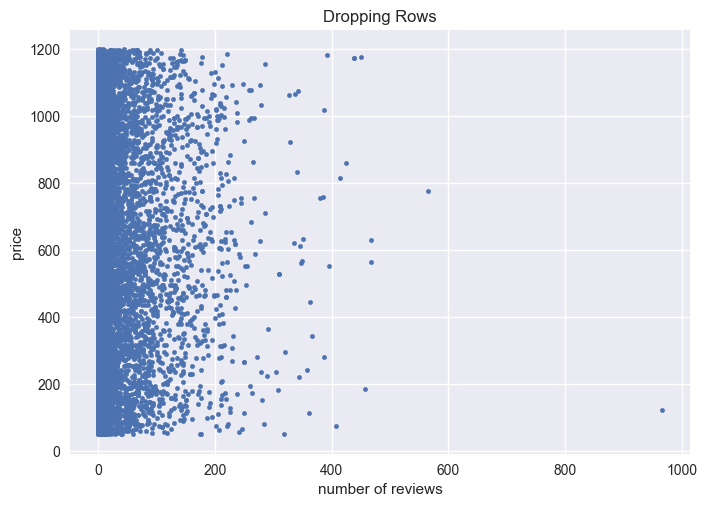

In [17]:
# Analyze visually with scatter plot
#Aqui cambie SEABORN por seaborn-v0_8 y me soluciono un error al graficar
plt.style.use('seaborn-v0_8')
fig = plt.Figure()
fig = df_drop_rows.plot(x="number of reviews", y='price', kind='scatter',
                    s = 10,
                    title='Dropping Rows', colorbar=False)

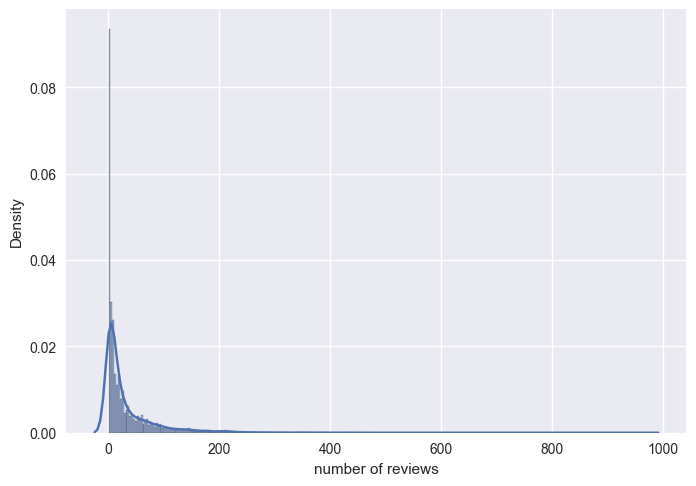

In [18]:
sns.histplot(
    df_drop_rows["number of reviews"], kde=True,
    stat="density", kde_kws=dict(cut=3)
)
sns.set_style("darkgrid")

In [19]:
df_mean = df.copy()
round(df_mean['number of reviews'].mean(), 2)

27.27

In [20]:
mean_imputer = SimpleImputer(missing_values = np.nan,strategy ='mean')
df_mean['number of reviews'] = mean_imputer.fit_transform(
    df_mean['number of reviews'].values.reshape(-1,1))

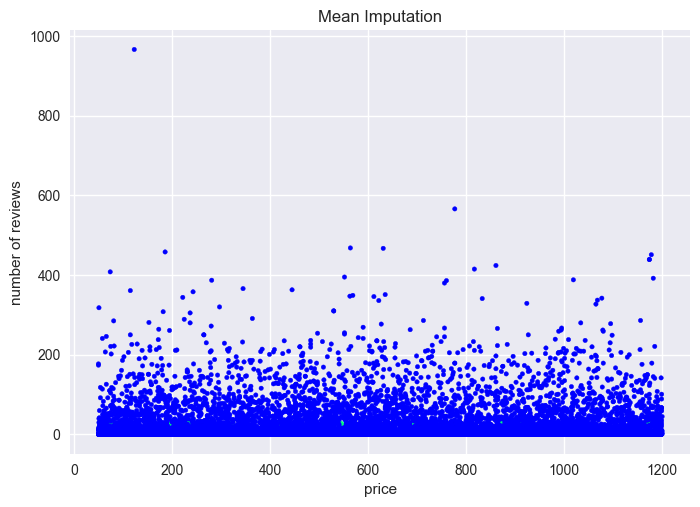

In [23]:
# Analyze visually with scatter plot
plt.style.use('seaborn-v0_8')
fig = plt.Figure()
null_values = df['number of reviews'].isnull()
fig = df_mean.plot(x="price", y='number of reviews', kind='scatter',
                     c=null_values, cmap='winter',s = 10,
                     title='Mean Imputation', colorbar=False)

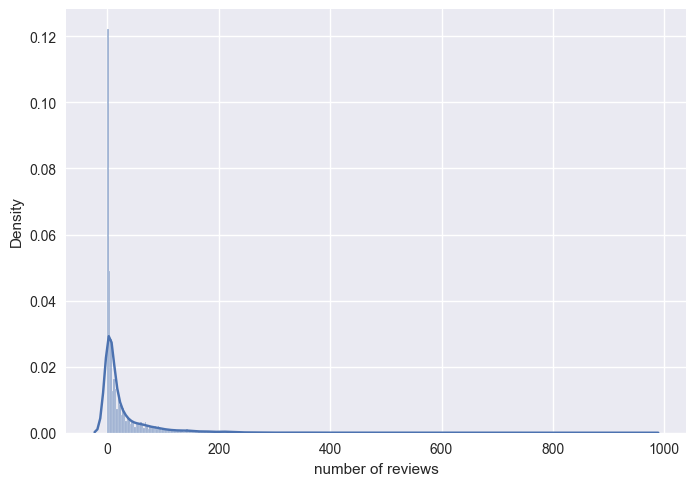

In [24]:
sns.histplot(
    df_mean["number of reviews"], kde=True,
    stat="density", kde_kws=dict(cut=3)
)
sns.set_style("darkgrid")

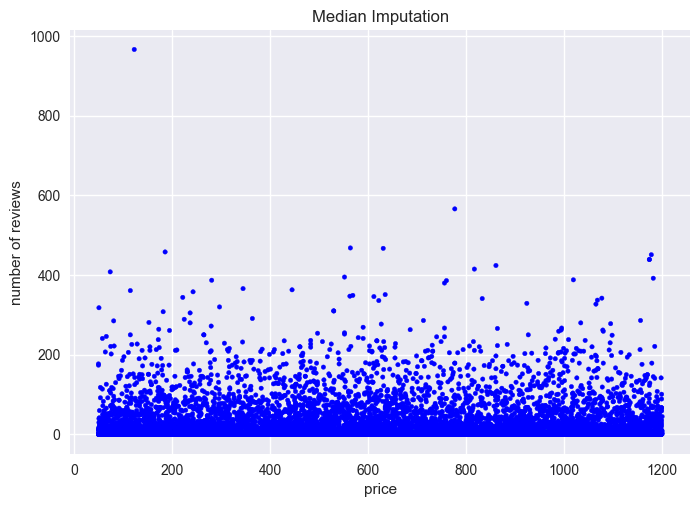

In [25]:
df_median = df.copy()
round(df_median['number of reviews'].median(), 2)

#Median Imputation
median_imputer = SimpleImputer(missing_values = np.nan,
                        strategy ='median')
df_median['number of reviews'] = median_imputer.fit_transform(
    df_median['number of reviews'].values.reshape(-1,1))

# Analyze visually with scatter plot
plt.style.use('seaborn-v0_8')
fig = plt.Figure()
null_values = df['number of reviews'].isnull()
fig = df_median.plot(x="price", y='number of reviews', kind='scatter',
                     c=null_values, cmap='winter',s = 10,
                     title='Median Imputation', colorbar=False)

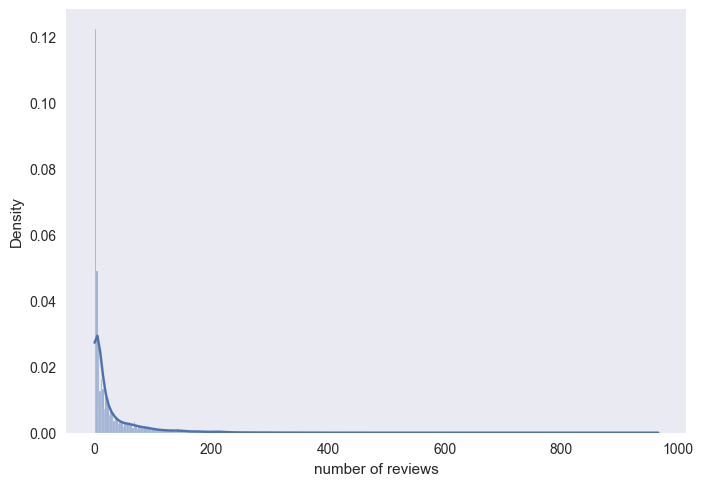

In [26]:
sns.histplot(
    df_median["number of reviews"], kde=True,
    stat="density")
plt.grid()
sns.set_style("darkgrid")

Most of the imputation technique can cause bias. Simple imputation can result in an underestimation of standard errors. Simple imputed data for any statistic can lead to an underestimation of the standard error. As the number of missing data increases, simple imputation methods should be avoided.





<div style="color:white;display:fill;border-radius:8px;
            background-color:#2C3E50 ;font-size:110%;
            font-family:Helvetica;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>2.2) Advanced imputation methods</b></p>
</div>

One commonly adopted strategy for addressing missing data is to employ a predictive model to estimate the absent values. This technique entails developing a separate model for each input variable containing missing entries.

The default value of K is set to 5. Although there is no definitive method for determining the ideal value of K, a commonly used heuristic suggests that the optimal K is often the square root of the total number of samples in the dataset. Typically, an odd value is chosen for K to prevent ties in decision-making. To identify the most suitable K, an error plot or accuracy plot is commonly used.

In [27]:
df_knn = df.copy()
df_knn = df_knn.filter(['price','minimum nights','number of reviews','reviews per month','calculated host listings count','availability 365'], axis=1).copy()
df_knn.head()

scaler = MinMaxScaler(feature_range=(0, 1))
df_knn = pd.DataFrame(scaler.fit_transform(df_knn), columns = df_knn.columns)

# Define KNN imputer and fill missing values
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=df_knn.columns)

df_knn_imputed.head()

,price,minimum nights,number of reviews,reviews per month,calculated host listings count,availability 365
0,0.783478,0.084656,0.000000,0.022177,0.000000,0.091743
1,0.428696,0.037037,0.042443,0.080697,0.012085,0.410550
2,0.662609,0.190476,0.013458,0.019158,0.009063,0.022936
3,0.241739,0.039683,0.002070,0.001742,0.000000,0.855505
4,0.071304,0.037037,0.049689,0.027866,0.000000,0.534404


In [28]:
original_data = scaler.inverse_transform(df_knn_imputed)
# Convert the original data to a DataFrame
df_original = pd.DataFrame(original_data, columns=df_knn.columns)

df_original.head()

,price,minimum nights,number of reviews,reviews per month,calculated host listings count,availability 365
0,951.0,20.0,0.0,0.774,1.0,30.0
1,543.0,2.0,41.0,2.790,5.0,169.0
2,812.0,60.0,13.0,0.670,4.0,0.0
3,328.0,3.0,2.0,0.070,1.0,363.0
4,132.0,2.0,48.0,0.970,1.0,223.0


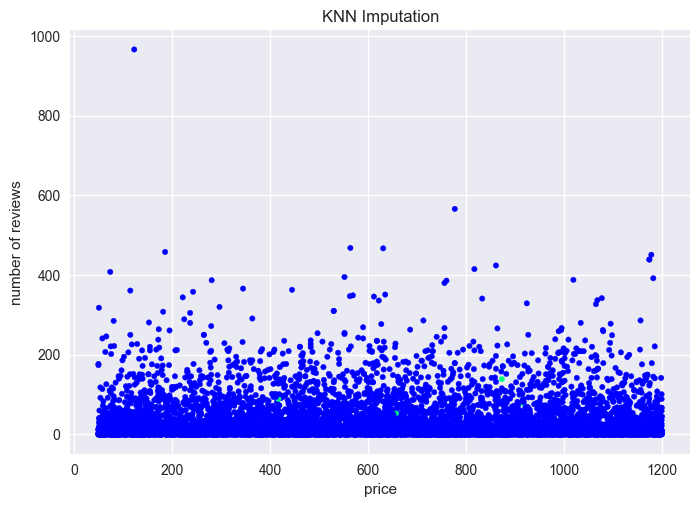

In [30]:
fig = plt.Figure()
null_values = df['number of reviews'].isnull()
fig = df_original.plot(x='price', y='number of reviews', kind='scatter',
                          c=null_values, cmap='winter', s = 15,
                          title='KNN Imputation', colorbar=False)

Text(0.5, 1.0, 'KNN Imputation')

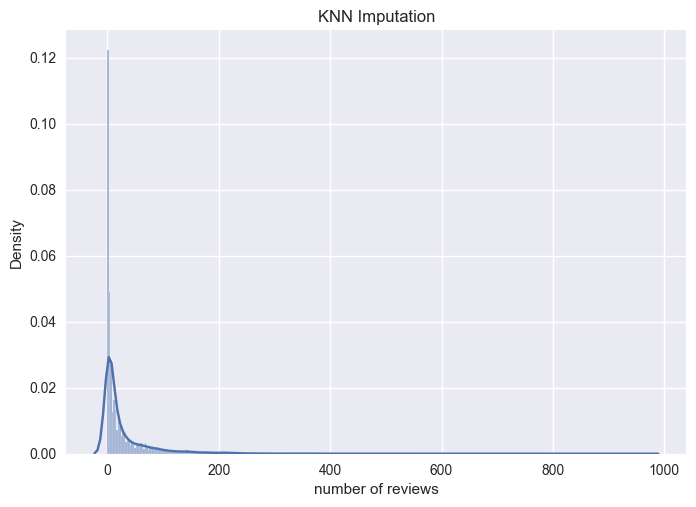

In [31]:
sns.histplot(
    df_original["number of reviews"], kde=True,
    stat="density", kde_kws=dict(cut=3)
)
plt.title('KNN Imputation')

K-Nearest Neighbors (KNN) imputation tends to incur higher computational costs compared to simple imputation methods. However, it's important to note that KNN imputation remains effective for datasets that do not exceed the scale of tens of millions of records. However, as we can see from the scatterplots, knn seems to have completed the missing values in a way that does not distort a normal distribution.

MICE Imputation, short for 'Multiple Imputation by Chained Equation' is an advanced missing data imputation technique that uses multiple iterations of Machine Learning model training to predict the missing values using known values from other features in the data as predictors.
How does MICE algorithm work?

Here is a quick intuition (not the exact algorithm)

    You basically take the variable that contains missing values as a response 'Y' and other variables as predictors 'X'.
    Build a model with rows where Y is not missing.
    Then predict the missing observations. Do this multiple times by doing random draws of the data and taking the mean of the predictions

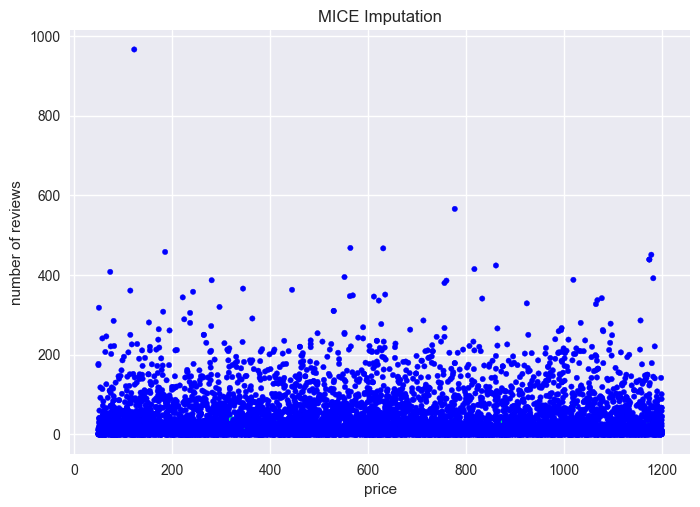

In [33]:
df_mice = df.copy()
df_mice = df.filter(['price','minimum nights','number of reviews','reviews per month','calculated host listings count','availability 365'], axis=1).copy()

# Define MICE Imputer and fill missing values
mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')
df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(df_mice), columns=df_mice.columns)

fig = plt.Figure()
null_values = df['number of reviews'].isnull()
fig = df_mice_imputed.plot(x='price', y='number of reviews', kind='scatter',
                           c=null_values, cmap='winter', s = 15,
                           title='MICE Imputation', colorbar=False)

Text(0.5, 1.0, 'MICE Imputation')

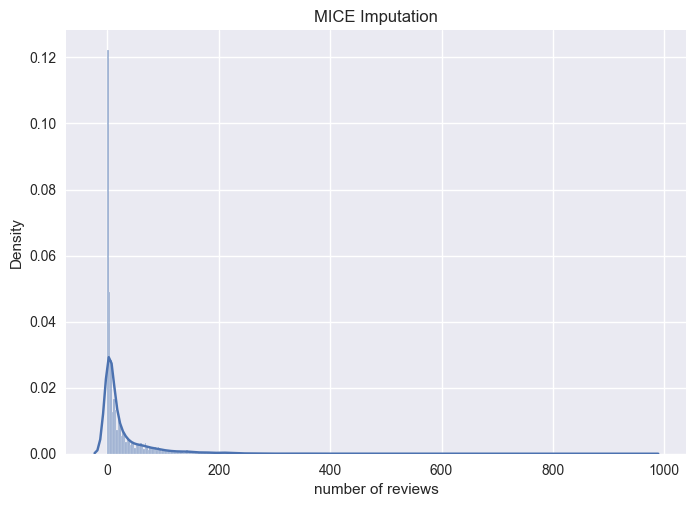

In [34]:
sns.histplot(
    df_mice_imputed["number of reviews"], kde=True,
    stat="density", kde_kws=dict(cut=3)
)
plt.title('MICE Imputation')

In [36]:
# Comparacion de todos los métodos
drop_rows = pd.Series(df_drop_rows["number of reviews"], name='drop_rows')
df_mean_ins = pd.Series(df_mean["number of reviews"], name='Mean_Imp')
df_median_ins = pd.Series(df_median["number of reviews"], name='Median_Imp')
df_knn_ins = pd.Series(df_original["number of reviews"], name='KNN_Imp')
df_mice_ins = pd.Series(df_mice_imputed["number of reviews"], name='MICE_Imp')

In [37]:
df_all = pd.concat([df_mean_ins,df_median_ins,df_knn_ins,df_mice_ins],axis=1)
df_all.head()

,Mean_Imp,Median_Imp,KNN_Imp,MICE_Imp
0,0.0,0.0,0.0,0.0
1,41.0,41.0,41.0,41.0
2,13.0,13.0,13.0,13.0
3,2.0,2.0,2.0,2.0
4,48.0,48.0,48.0,48.0


In [38]:

df_dropped = drop_rows.to_frame()
drop_desc = df_dropped.describe().loc[['mean', 'std']].T
drop_desc

,mean,std
drop_rows,32.178126,51.636966


In [39]:
drop_desc['std'][0]

C:\Users\st4mf\AppData\Local\Temp\ipykernel_10800\2846259064.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



51.63696594125205

In [40]:
df_desc = df_all.describe().loc[['mean', 'std']].T
df_desc

,mean,std
Mean_Imp,27.274263,48.906372
Median_Imp,27.238694,48.913731
KNN_Imp,27.291150,48.934740
MICE_Imp,27.271548,48.910819


C:\Users\st4mf\AppData\Local\Temp\ipykernel_10800\4134462270.py:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\st4mf\AppData\Local\Temp\ipykernel_10800\4134462270.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



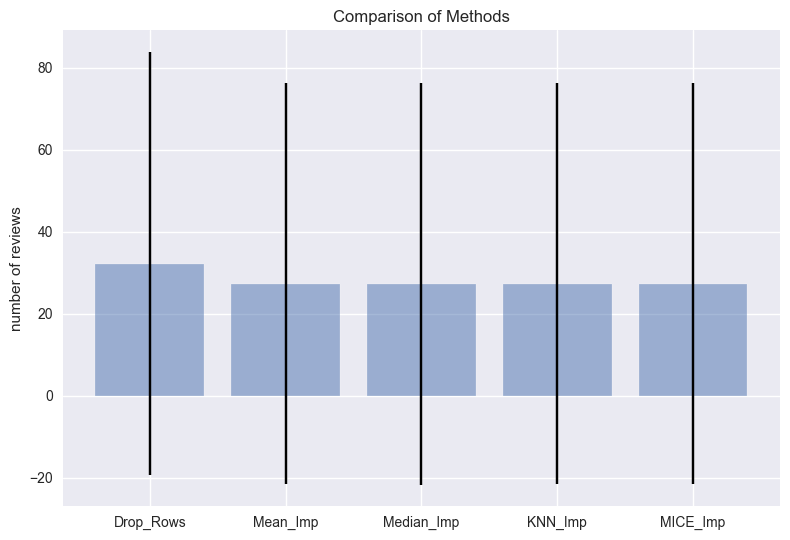

In [41]:
# error bars
# Define labels, positions, bar heights and error bar heights
labels = ['Drop_Rows','Mean_Imp', 'Median_Imp', 'KNN_Imp', 'MICE_Imp']
x_pos = np.arange(len(labels))
CTEs = [drop_desc['mean'][0],df_desc["mean"][0], df_desc["mean"][1], df_desc["mean"][2], df_desc["mean"][3]]
error = [drop_desc['std'][0],df_desc["std"][0], df_desc["std"][1], df_desc["std"][2], df_desc["std"][3]]

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('number of reviews')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Comparison of Methods')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()